# Tarea 1: Problema 1

La regresión lineal, modelo que busca la mejor forma de combinar linealmente variables para predecir otra variable numérica es una de las herramientas más básicas a nuestra disposición. Sin embargo se pueden encontrar muchas aplicaciones a esta aproximación con buenos resultados, y suele ser un buen punto de partida para problemas totalmente desconocidos, dada su velocidad de implementación y facilidad de interpretación. Además, al igual que muchas de las técnicas de *Machine Learning*, no tiene un ámbito de uso definido, es decir podemos aplicar un método similar para problemas radicalmente distintos.

En este problema se trabajará con un dataset de Kaggle llamado "COVID-19 State Data", el cual contiene el registro del número de infectado, recuperados y muertos debido a la pandemia junto a datos pertinentes a cada estado de EEUU. 

El dataset se obtuvo de  https://www.kaggle.com/nightranger77/covid19-state-data. Es importante mencionar que se trabajará con la versión 11 del dataset actualizado el 24 de abril, dado que este dataset se encuentra constantemente actualizándose.

**Versión del dataset a utilizar y la fecha de subida asociada**

In [1]:
version = 11
fecha_subida = "04/24/20"      #mm/dd/yy     Notación EEUU

## 1.a Libererías y Data

i) Librerias a utilizar, manipulación de datos y breve descripción del significado de cada columna del dataset

In [2]:
import pandas as pd                                                       # Manejo de Datos
import matplotlib.pyplot as plt                                           # Graficar
import numpy as np                                                        # Manejo Matemático
import scipy
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression
data = pd.read_csv("COVID19_state.csv")                                   # Archivo a Utilizar

In [3]:
# Muestra los 5 primeras filas del data
data.head()                                                               

,State,Tested,Infected,Deaths,Population,Pop Density,Gini,ICU Beds,Income,GDP,...,Hospitals,Health Spending,Pollution,Med-Large Airports,Temperature,Urban,Age 0-25,Age 26-54,Age 55+,School Closure Date
0,Alaska,11473,337,9,734002,1.2863,0.4081,119,59687,73205,...,21,11064,6.4,1.0,26.6,66.0,0.36,0.39,0.25,03/19/20
1,Alabama,48387,5832,201,4908621,96.9221,0.4847,1533,42334,45219,...,101,7281,8.1,1.0,62.8,59.0,0.33,0.37,0.31,03/16/20
2,Arkansas,34551,2599,45,3038999,58.4030,0.4719,732,42566,42454,...,88,7408,7.1,0.0,60.4,56.2,0.34,0.37,0.30,03/17/20
3,Arizona,58697,5769,249,7378494,64.9550,0.4713,1559,43650,48055,...,83,6452,9.7,1.0,60.3,89.8,0.33,0.36,0.30,03/16/20
4,California,308700,37369,1469,39937489,256.3727,0.4899,7338,62586,74205,...,359,7549,12.8,9.0,59.4,95.0,0.33,0.40,0.26,03/19/20


In [4]:
# Obtiene datos estadisticos del data    
data.describe()                                                           

,Tested,Infected,Deaths,Population,Pop Density,Gini,ICU Beds,Income,GDP,Unemployment,...,Physicians,Hospitals,Health Spending,Pollution,Med-Large Airports,Temperature,Urban,Age 0-25,Age 26-54,Age 55+
count,51.000000,51.000000,51.000000,5.100000e+01,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,...,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,88298.058824,16914.294118,867.176471,6.496451e+06,431.560508,0.466165,1466.411765,51597.607843,61497.333333,3.515686,...,19711.666667,101.921569,8332.156863,7.413725,1.215686,51.999020,74.107843,0.323529,0.376471,0.299020
std,113065.183676,39209.390300,2325.420020,7.450657e+06,1647.225920,0.023455,1562.124594,8224.387459,22648.274324,0.831233,...,22532.917088,88.881909,1256.751246,1.457535,1.758564,8.627992,14.885481,0.027116,0.019680,0.030936
min,11473.000000,337.000000,9.000000,5.670250e+05,1.286300,0.406300,94.000000,37994.000000,37948.000000,2.200000,...,1172.000000,7.000000,5982.000000,4.400000,0.000000,26.600000,38.700000,0.260000,0.350000,0.210000
25%,23613.500000,2253.000000,58.500000,1.802113e+06,50.604850,0.452050,327.000000,45981.000000,51156.000000,2.850000,...,5656.000000,44.500000,7390.000000,6.650000,0.000000,45.300000,65.400000,0.305000,0.370000,0.290000
50%,51548.000000,5052.000000,191.000000,4.499692e+06,108.049700,0.468000,1134.000000,49417.000000,57492.000000,3.400000,...,12205.000000,89.000000,8107.000000,7.400000,1.000000,51.700000,74.200000,0.320000,0.370000,0.300000
75%,101693.500000,14939.500000,693.000000,7.587794e+06,223.983100,0.479500,1841.500000,56610.000000,65971.500000,3.800000,...,23991.500000,129.500000,9095.500000,8.150000,1.000000,58.300000,87.550000,0.340000,0.385000,0.310000
max,695920.000000,263460.000000,15740.000000,3.993749e+07,11814.541000,0.542000,7338.000000,74561.000000,200277.000000,5.800000,...,112906.000000,523.000000,11944.000000,12.800000,9.000000,70.700000,100.000000,0.420000,0.480000,0.370000


**Comentarios:** de la descripción del data permite ver que todos los atributos son muy distintos en sus orden de magnitud en promedio, desviación estándar, mínimo, etc., por lo que será necesario realizar un pre-procesarlos para equiparar las magnitudes de las columnas.

El dataset contiene información referida a la pandemia, población e ingreso de los diferentes estados de Estados Unidos. A continuación se presenta una pequeña descripción de cada columna del dataset.

| Columna       | Descripción                                                             |
|:-------------:|:-----------------------------------------------------------------------:|
|1              | Estado del cual se tiene información.                                   |
|2              | Número de test realizados para la detección de COVID19.                 |
|3              | Número de infectados de COVID19.                                        |
|4              | Número de muertos por COVID19.                                          |
|5              | Población estimada por estado                                           |
|6              | Densidad de población por metro cuadrado.                               |
|7              | Coeficiente de Gini que es un parámetro de desigualdad de ingresos.     |
|8              | Número de camas de la UCI                                               |
|9              | Ingreso per cápita.                                                     | 
|10             | PIB per cápita por estado.                                              |
|11             | Desempleo como un porcentaje de la fuerza laboral del estado respectivo |
|12             | Razón entre hombres y mujeres                                           | 
|13             | Porcentaje de fumadores                                                 |
|14             | Tasa de muertes por influenza y neumonía por 100.000 personas           |
|15             | Tasa crónica de enfermedad respiratoria baja por cada 100,000 personas  |
|16             | Número de médicos activos de atención primaria y especializada          |  
|17             | Número de hospitales por cada estado.                                   |
|18             | Gastos por todos los servicios de salud                                 | 
|19             | Medición de la exposición del público a partículas                      |
|20             | Número de aeropuertos medios y grandes                                  |
|21             | Promedio de temperatura en 2019                                         |
|22             | Porcentaje de la población viviendo en un ambiente urbano.              |
|23             | Porcentaje de personas entre 0 - 25 años                                |
|24             | Porcentaje de personas entre 26 - 54 años                               |
|25             | Porcentaje de personas + 55 años                                        |
|26             | Fecha en que los colegios cerraron                                      |


ii) Se descartará la columna que contiene el nombre de los estados (columna 1).

In [5]:
data = data.drop(columns=["State"])                                       # Elimina columna State

**Comentarios:** se elimina los datos de la columna State dado que no es relevante para una regresión lineal

## 1.b Manipulación de datos

i) En la columna "School Closure Date" indica la fecha de cierre en cada Estado. No en todos los Estados tienen dicho dato, por lo que se reemplazará los valores NaN por la fecha con la cual se actualizó la versión del dataset.

In [6]:
data['School Closure Date'] = data['School Closure Date'].fillna(fecha_subida)

ii) Transformar valores de la columna "School Closure Date" a un valor númerico que indique el número de días que han pasado desde la fecha de cierre de las escuelas en cada Estado hasta el día de hoy.

In [7]:
months = {'01':31,'02':60,'03':91,'04':121,'05':152,'06':182,'07':213,'08':244,'09':274,'10':305,'11':335,'12':366}
today  = '05/16/20'
days   = months['0'+str(int(today[0:2])-1)]+int(today[3:5])
date   = data['School Closure Date'].copy()
for i in range(len(date)):
    date[i] = days - (months['0'+str(int(date[i][0:2])-1)]+int(date[i][3:5]))
data['School Closure Date'] = date

iii) Ventajas y desventajas de haber manipulado esta columan de este modo.

<br>Ventajas: <br>
* Pasar de una variable cualitativa a una variable cuantitativa como es la cantidad de días.
* Es importante cuantificar cuanto tiempo llevan cerradas los colegios, por ejemplo, para saber que estado tomó medidas preventivas primero.

<br>Desventajas: <br>
* Considerando que no se tiene información sobre algunos estados, por lo tanto al imponer dicha fecha se estan alterando los datos o perdiendo validez.


## 1.c Visualización Pre-Estandarización

i) Visualize las distribuciones de cada atributo del dataset mediante boxplots, histogramas, o lo que estime conveniente.

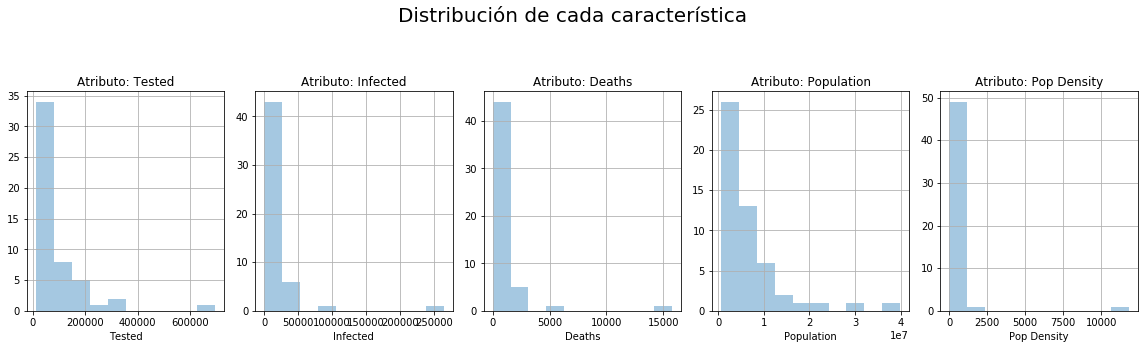

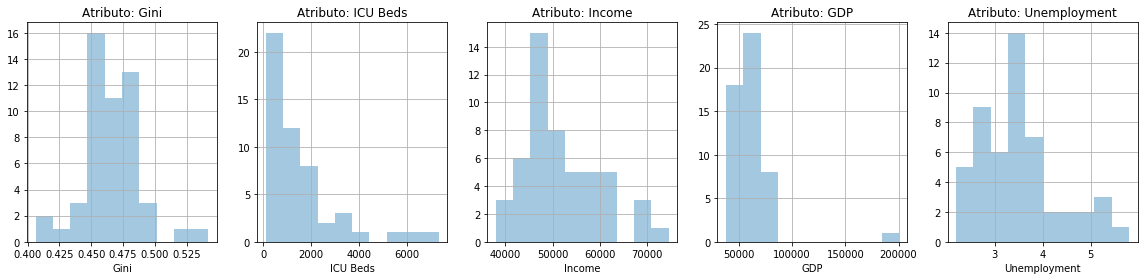

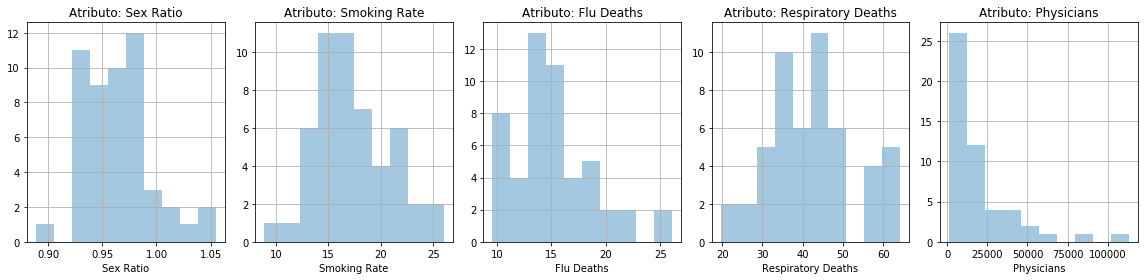

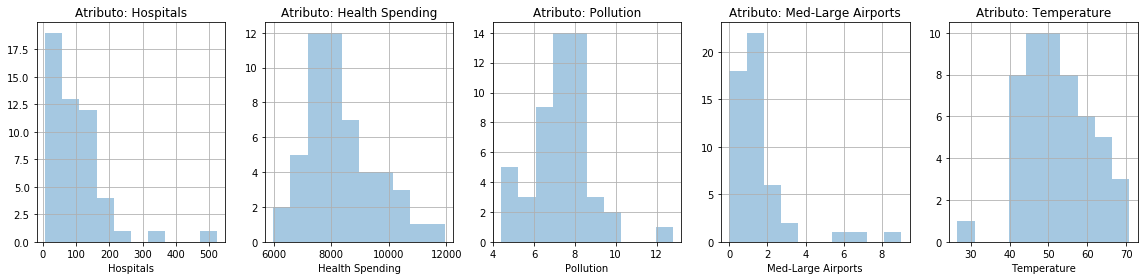

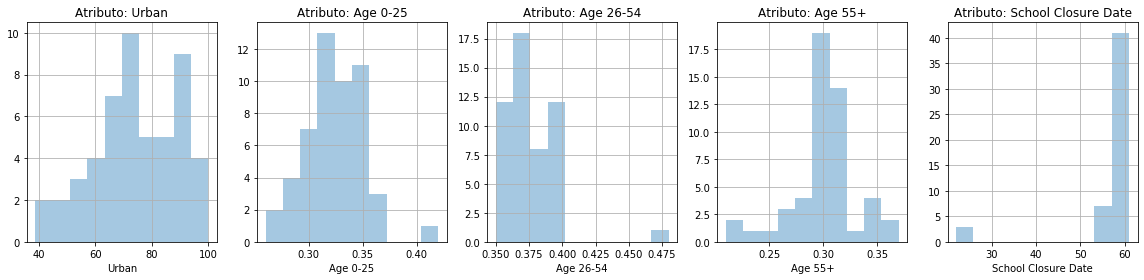

In [8]:
plt.rcParams['figure.figsize']=[16,4]                                # Controla tamaño del plot dentro del Notebook
import seaborn as sns                                                # Herramienta para plots
data_pre=data.astype(float)                                          # Retorna un numero flotante

plt.suptitle('Distribución de cada característica',size=20,y=1.2)
k=1
for i in data_pre.columns[:]:
    plt.subplot(1,5,k)
    plt.title('Atributo: '+str(i))
    sns.distplot(data_pre[i], kde=False, bins=10)
    plt.tight_layout()
    plt.grid()
    if k==5:
        k=1
        plt.show()
    else:
        k+=1

**Comentarios:** mediante un histograma se puede ver como están distribuido los datos. Los primeros 5 atributos se puede ver que los datos están concentrados principalmente en valores bajo y dado la baja frecuencia de valores altos, estos pueden ser outliers (como es el caso de test)

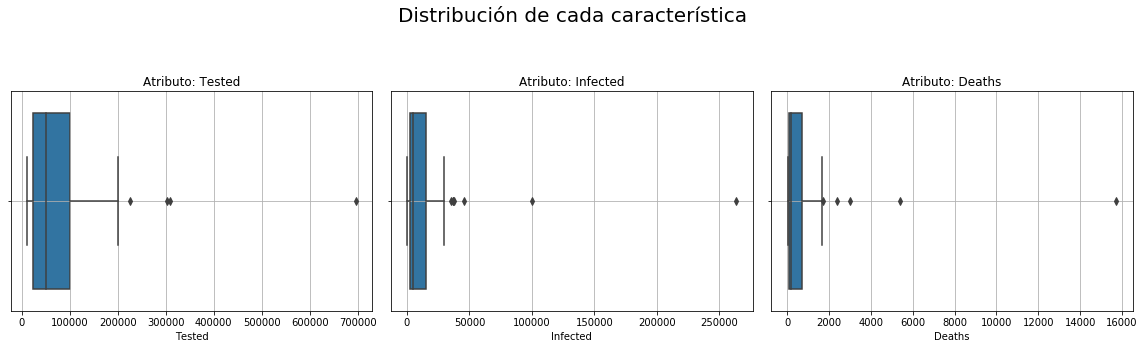

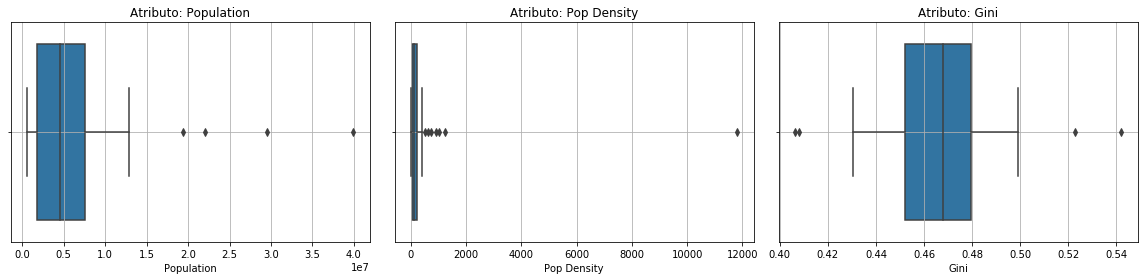

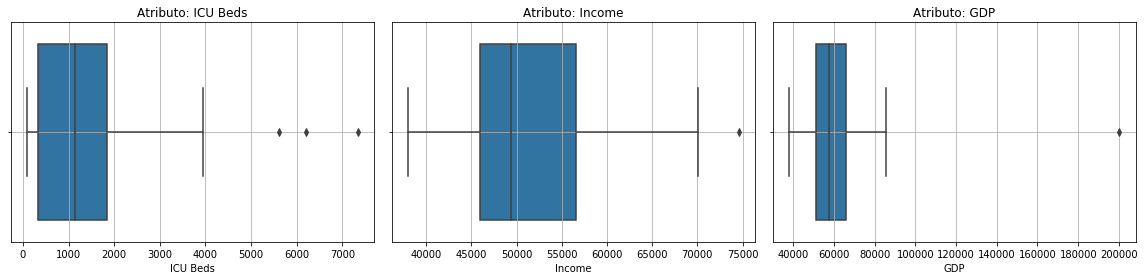

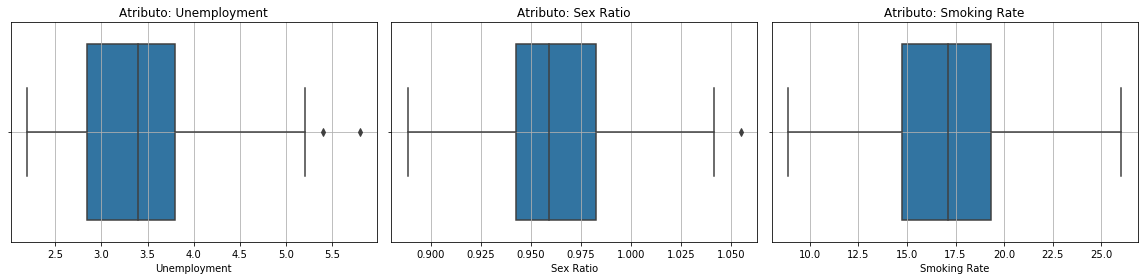

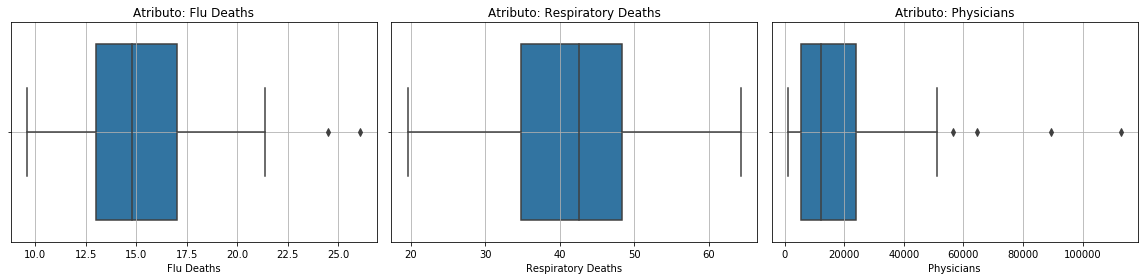

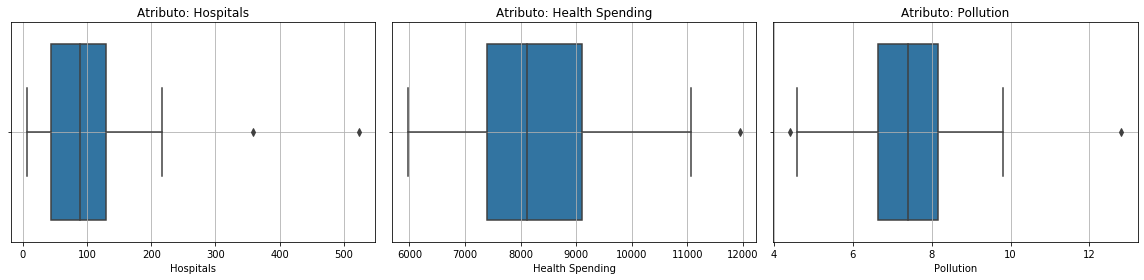

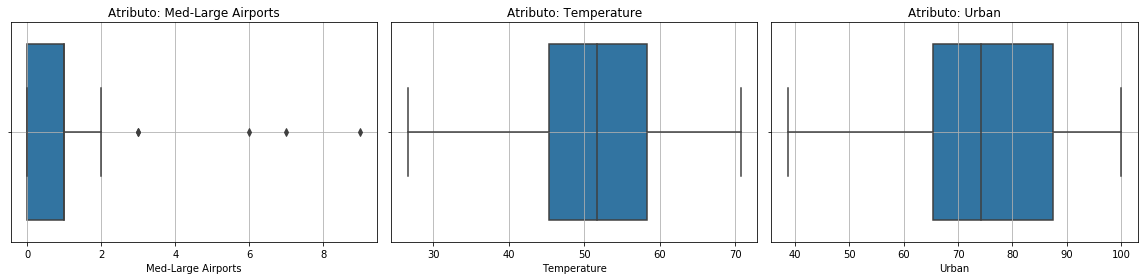

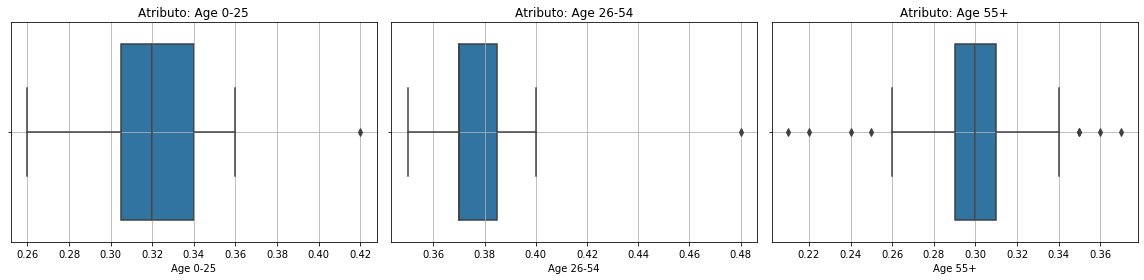

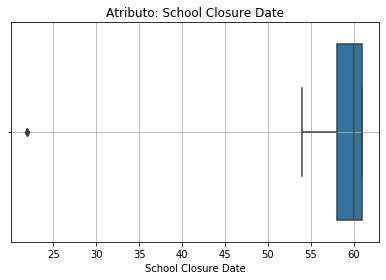

In [10]:
plt.rcParams['figure.figsize']=[16,4]                                # Controla tamaño del plot dentro del Notebook
import seaborn as sns                                                # Herramienta para plots
data_pre=data.astype(float)                                          # Retorna un numero flotante

plt.suptitle('Distribución de cada característica',size=20,y=1.2)
k=1
for i in data_pre.columns[:]:
    plt.subplot(1,3,k)
    plt.title('Atributo: '+str(i))
    sns.boxplot(data_pre[i]);
    plt.tight_layout()
    plt.grid()
    if k==3:
        k=1
        plt.show()
    else:
        k+=1

**Comentarios:** Para interpretar dichos gráficos es necesario conocer la información que entrega una gráfica de caja. Este gráfico permite visualizar la simetría de los datos, la existencia de outliers, la dispersión respecto a la mediana y el rango de los datos. Del gráfico se puede obtener:
* La media se representa por la línea dentro de la caja
* Dentro de la caja se encuentran los 50% por ciento de los datos, por lo tanto una caja más chica que otra se puede interpretar que los datos están más concentrados.
* Bigotes representan los 25% de los datos, contra más grande los bigotes más dispersos son los datos.
* Outliers están representados por los puntos fuera de los bigotes. Según el gráfico anterior se pueden apreciar gran cantidad de outliers en diferentes atributos.

ii) ¿Reconoce Outliers?¿Qué consecuencias podría tener el aplicar una técnica de regresión lineal para predicciones en este data set?

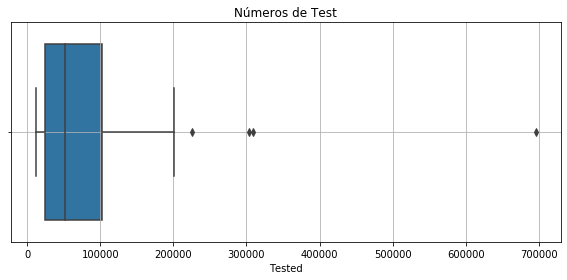

In [17]:
plt.rcParams['figure.figsize']=[8,4]   
plt.title('Números de Test')  
sns.boxplot(data_pre['Tested'])
plt.tight_layout()
plt.grid()
plt.show()

Respuesta:

* Como se puede ver en el gráfico del número de test, la media se encuentra cerca de los 50.000 test, el 50% de los datos estan entre los 25.000 y 100.000 tests y por último, se ven 3 outliers que corresponden a 3 puntos donde el máximo número de test es igual a 700.000. Lo cual está muy por sobre del promedio

* Un problema de aplicar regresión lineal es que, por ejemplo, para los casos de infectos y muertes tiene outliers muy alejados de la media. Esto genera que los parámetros del modelo se vean modificado y, por ende, se ve afectado el error. 

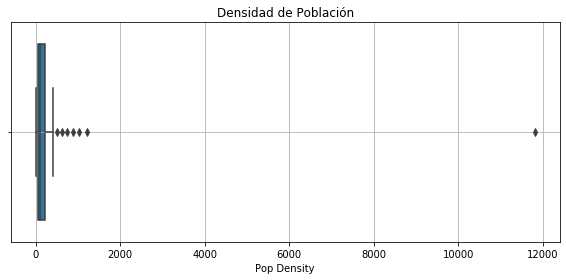

In [18]:
plt.rcParams['figure.figsize']=[8,4]   
plt.title('Densidad de Población')  
sns.boxplot(data_pre['Pop Density'])
plt.tight_layout()
plt.grid()
plt.show()


**Comentarios:** se puede ver que en el gráfico anterior grandes outliers y muy alejados de la media y de la concentración de todos los datos.

iii) Comente, con fundamentos matemáticos, qué calcula la matriz de correlación y cómo se interpretan sus resultados en general.

Sea $A$ la matriz de correlación del dataset en cuestión, la cual tiene por ojetivo calcular los valores de correlación de Pearson, es decir, el grado de relación lineal entre cada par de elementos o variable. Cada entrada $A_{ij}$ representa un coeficiente de correlación entre variables cuantitativas.

Dicha matriz tiene ciertas propiedades, dado que la matriz representa la relación entre las variables $\mathbf{x}=\{x_1,x_2,...,x_n\}$, es importante notar que la relación entre la variable $x_1$ con sigo misma es perfecta, es decir, se cumple que $A_{ij}=1 \quad \forall i=j$. Además, se deprenden propiedades como que la matriz es cuadrada y simétrica. Por último, la matriz es también semidefinida positiva. La matriz de correlación se puede escribir como:

$$A =\mathbf{x}\mathbf{x}^T=\left[\begin{array}{cccc}
x_1x_1 & x_1x_2 & \cdots & x_1x_n \\
\vdots & \vdots & \ddots & \vdots \\
x_nx_1 & x_nx_2 & \cdots & x_nx_n
\end{array}\right]=\left[\begin{array}{cccc}
1 & x_1x_2 & \cdots & x_1x_n \\
\vdots & \vdots & \ddots & \vdots \\
x_nx_1 & x_nx_2 & \cdots & 1
\end{array}\right]$$

Cada coeficiente de correlación $x_ix_j$ varía en el intervalor $[-1,1]$. Dependiendo del valor del coeficiente se pueden sacar las siguientes conclusiones:
* Si $x_ix_j=1$ la correlación es positiva y perfecta. Refleja una dependencia total entre ambas variables, es decir, existe una relación directa entre ambas, si una aumenta, la otra tambien aumentará. 
* Si $0<x_ix_j<1$ se dice que se tiene una correlación positiva, mientras más cerca de 1 mejor será la correlación entre las variables.
* Si $x_ix_j=0$ implica que no existe correlación entre ambas variables, no implica que sean variables independientes, solo que la relación entre las variables no es lineal.
* Si $-1<x_ix_j<0$ indica que existe una correlación negativa.
* Si $x_ix_j=-1$ corresponde a una correlación negativa perfecta que básicamente es una relación inversa entre ambas variables.

Se puede considerar que variables con valores de correlación mayor que 0.5 se consideran altamente correlacionadas.

iv) Calcule la matriz de correlación entre características y posteriormente graficarlas.

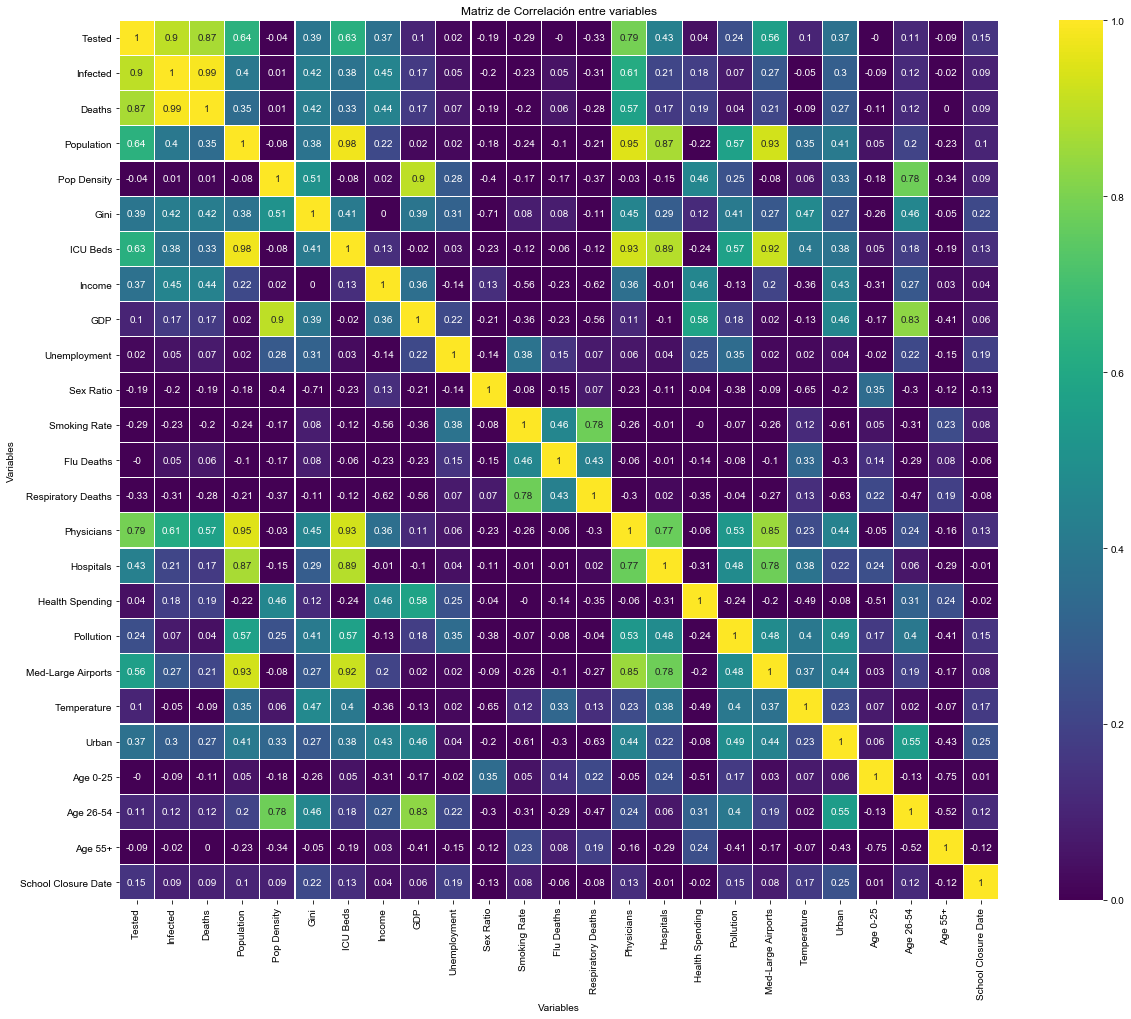

In [19]:
plt.figure(figsize=(18,14))                            #  Otro modo de controlar el tamaño del plot dentro del Notebook
sns.heatmap(np.around(data_pre.corr(),decimals=2), vmax=1,vmin=0, linewidths=0.1,
            square=True,annot=True,cmap='viridis',linecolor="white")
sns.set(font_scale=1)
plt.tight_layout()
plt.ylabel('Variables')
plt.xlabel('Variables')
plt.title('Matriz de Correlación entre variables');
plt.show()

v) En base a la matriz de correlación que ha graficado, ¿Cómo se relacionan el resto de las variables con el número de tests, casos y muertes? (cuales son las más relevantes)

**Comentarios:** Se puede ver que existe una fuerte correlación entre el número de test, el número de infectos y el número de muertos. De forma independiente se tiene:
* El número de test tiene una buena correlación con la cantidad de población, la cantidad de camas en la UCI, la cantidad de médicos. Por último, se puede considerar que existe una correlación entre el número de test con los aeropuertos.
* El número de infectados tiene buena correlación, aparte del número de test y de muertos, con la variable que representa la cantidad de médicos.
* El número de muertes, tiene buena correlación con las mismas variables que el número de infectados.

La correlación de estas variables tienen sentido común, por ejemplo, que el número de infectados relación directa con el número de test y muertos.

vi) ¿Cree que se cuenta con suficiente información para sacar conclusiones? Comente las debilidades que presenta el dataset respecto a la aplicación de un análisis lineal para realizar predicciones.

**Comentarios:**
- Creo que se cuenta con la información necesaria para poder trabajar con este dataset, pero también es importante considerar que no todas las variables tienen una correlación buena como se puede ver en la matriz de correlación.

- Como se mencionó antes, que las variables tengan buena correlación implica que estas se pueden tratar con un análisis lineal. Si la correlación es baja, lo más probable es que las variables no se relacionen linealmente por lo que se puede presentar el caso que no se obtenga buenos resultados para algunas variables por el hecho de estar forzando la regresión lineal.

- Por otro lado, la cantidad de datos son muy pocos, para sacar grandes conclusiones sobre todo considerando la cantidad de outliers en comparación a la cantidad de datos que se cuenta.

## 1.d Separación de datos 

i) Se separaran los datos de train, validation y test con aproximadamente un 80%, 10%, 10% de los datos respectivamente.

**Comentarios:** Si se reparte 75%, 15%, 15%, se pierde la correlación entre los test, número de infectados y el número de muertos.

In [30]:
data_pre = data.astype(float)                                            
data_train, data_temp = train_test_split(data_pre, test_size= 0.18)        # Divide la data según test_size (%)
data_val, data_test = train_test_split(data_temp, test_size=0.5)           # Divide data_temp en data_val y data_test

# Muestra que porcentaje de la data es cada set
print("Training set proportion: ", len(data_train)/len(data)*100, "percent of data", "Size:", len(data_train))
print("Validation set proportion: ",len(data_val)/len(data)*100 , "percent of data", "Size:", len(data_val))
print("Testing set proportion: ", len(data_test)/len(data)*100, "percent of data", "Size:", len(data_test))

Training set proportion:  80.3921568627451 percent of data Size: 41
Validation set proportion:  9.803921568627452 percent of data Size: 5
Testing set proportion:  9.803921568627452 percent of data Size: 5


ii) Comente los trade-offs existentes al asignar porcentajes mayores o menores a cada conjunto (train, validation, test), en particular con el dataset que se está trabajando.

**Comentarios:** cada set tiene un objetivo particular, por lo que es importante poder encontrar una buena forma de dividir la data en porcentajes adecuados.

* El trian set es el conjunto con el cual se entrena el modelo, por lo que generalmente es el el conjunto más grande. Dado que la data es pequeña si considera un 80% de los datos, quedan muy pocos para los otros dos subconjuntos. Así, el validation y test set quedan entre 5 y 6 datos, lo cual puede ser un problema si uno o más datos de esos subconjuntos tiene outliers. Como resultado de eso se puede obtener que los errores sean muy grande y por ende, se concluya que el modelo no es bueno.

* Dado que la división de datos es aleatoria, cambia el orden donde pueden quedar los outliers y sumado a que son poca cantidad de datos, implica que en cada iteración se obtendrán valores distintos.

iii) Se tratará de predecir dos variables distintas, número de infectados y muertos. Separe la entrada y salida para cada conjunto (train, validation, test). Separe los dos target del resto de las variables.

In [31]:
# Training set
y1_tr = data_train["Infected"]                               # Target de la variable infectados
y2_tr = data_train["Deaths"]                                 # Target de la variable muertos
x_tr  = data_train.drop(columns = ["Infected", "Deaths"])    # Eliminar columnas de las variables mencionadas

# Validation set
y1_val = data_val["Infected"]                                # Target de la variable infectados
y2_val = data_val["Deaths"]                                  # Target de la variable muertos
x_val  = data_val.drop(columns = ["Infected", "Deaths"])     # Eliminar columnas de las variables mencionadas

# Test set
y1_tst = data_test["Infected"]                               # Target de la variable infectados
y2_tst = data_test["Deaths"]                                 # Target de la variable muertos
x_tst  = data_test.drop(columns = ["Infected", "Deaths"])    # Eliminar columnas de las variables mencionadas

iv) Realice la estandarización

In [32]:
# Estandarización de Variables
scaler_x  = StandardScaler()                           # Normalización Estándar x
scaler_y1 = StandardScaler()                           # Normalización Estándar y1 => Infectados
scaler_y2 = StandardScaler()                           # Normalización Estándar y2 => Muertos

# train set

# Variable x_tr
scaler_x.fit (x_tr.values)                             # Computa el promedio y desviación estandar de los datos.
x_tr_st = scaler_x.transform(x_tr.values)              # Estandariza la variable

# Variable y1
scaler_y1.fit(y1_tr.values.reshape(-1,1))
y1_tr_st = scaler_y1.transform(y1_tr.values.reshape(-1,1))

#Variable y2
scaler_y2.fit(y2_tr.values.reshape(-1,1))
y2_tr_st = scaler_y2.transform(y2_tr.values.reshape(-1,1))

# Validation set

# Variable x_tr
scaler_x.fit (x_val.values)                              # Computa el promedio y desviación estandar de los datos.
x_val_st = scaler_x.transform(x_val.values)              # Estandariza la variable centrada y escalada

# Variable y1
scaler_y1.fit(y1_val.values.reshape(-1,1))
y1_val_st = scaler_y1.transform(y1_val.values.reshape(-1,1))

#Variable y2
scaler_y2.fit(y2_val.values.reshape(-1,1))
y2_val_st = scaler_y2.transform(y2_val.values.reshape(-1,1))

# Test set

# Variable x_tr
scaler_x.fit (x_tst.values)                              # Computa el promedio y desviación estandar de los datos.
x_tst_st = scaler_x.transform(x_tst.values)              # Estandariza la variable centrada y escalada

# Variable y1
scaler_y1.fit(y1_tst.values.reshape(-1,1))
y1_tst_st = scaler_y1.transform(y1_tst.values.reshape(-1,1))

#Variable y2
scaler_y2.fit(y2_tst.values.reshape(-1,1))
y2_tst_st = scaler_y2.transform(y2_tst.values.reshape(-1,1))

v) Desarrolle una función de python que realice el proceso anterior

In [33]:
# Función que divide la data en train, validation y test set y luego estandariza las variables
def call_separation_of_data(data,v1,v2):
    data_pre = data.astype(float)
    data_train, data_temp = train_test_split(data_pre, test_size= v1)        # Divide la data según test_size (%)
    data_val, data_test   = train_test_split(data_temp, test_size= v2)       # Divide data_temp en data_val y data_test
    
    # Training set
    y1_tr = data_train["Infected"]                               # Target de la variable infectados
    y2_tr = data_train["Deaths"]                                 # Target de la variable muertos
    x_tr  = data_train.drop(columns = ["Infected", "Deaths"])    # Eliminar columnas de las variables mencionadas

    # Validation set
    y1_val = data_val["Infected"]                                # Target de la variable infectados
    y2_val = data_val["Deaths"]                                  # Target de la variable muertos
    x_val  = data_val.drop(columns = ["Infected", "Deaths"])     # Eliminar columnas de las variables mencionadas

    # Test set
    y1_tst = data_test["Infected"]                               # Target de la variable infectados
    y2_tst = data_test["Deaths"]                                 # Target de la variable muertos
    x_tst  = data_test.drop(columns = ["Infected", "Deaths"])    # Eliminar columnas de las variables mencionadas
    
    # Estandarización de Variables
    scaler_x  = StandardScaler()                           # Normalización Estándar x
    scaler_y1 = StandardScaler()                           # Normalización Estándar y1 => Infectados
    scaler_y2 = StandardScaler()                           # Normalización Estándar y2 => Muertos

    # train set

    # Variable x_tr
    scaler_x.fit (x_tr.values)                             # Computa el promedio y desviación estandar de los datos.
    x_tr_st = scaler_x.transform(x_tr.values)              # Estandariza la variable centrada y escalada

    # Variable y1
    scaler_y1.fit(y1_tr.values.reshape(-1,1))
    y1_tr_st = scaler_y1.transform(y1_tr.values.reshape(-1,1))

    #Variable y2
    scaler_y2.fit(y2_tr.values.reshape(-1,1))
    y2_tr_st = scaler_y2.transform(y2_tr.values.reshape(-1,1))

    # Validation set

    # Variable x_tr
    scaler_x.fit (x_val.values)                              # Computa el promedio y desviación estandar de los datos.
    x_val_st = scaler_x.transform(x_val.values)              # Estandariza la variable centrada y escalada

    # Variable y1
    scaler_y1.fit(y1_val.values.reshape(-1,1))
    y1_val_st = scaler_y1.transform(y1_val.values.reshape(-1,1))

    #Variable y2
    scaler_y2.fit(y2_val.values.reshape(-1,1))
    y2_val_st = scaler_y2.transform(y2_val.values.reshape(-1,1))

    # Test set

    # Variable x_tr
    scaler_x.fit (x_tst.values)                              # Computa el promedio y desviación estandar de los datos.
    x_tst_st = scaler_x.transform(x_tst.values)              # Estandariza la variable centrada y escalada

    # Variable y1
    scaler_y1.fit(y1_tst.values.reshape(-1,1))
    y1_tst_st = scaler_y1.transform(y1_tst.values.reshape(-1,1))

    #Variable y2
    scaler_y2.fit(y2_tst.values.reshape(-1,1))
    y2_tst_st = scaler_y2.transform(y2_tst.values.reshape(-1,1))
    
    return (x_tr,y1_tr,y2_tr,
            x_val,y1_val,y2_val,
            x_tst,y1_tst,y2_tst,
            x_tr_st,y1_tr_st,y2_tr_st,
            x_val_st,y1_val_st,y2_val_st,
            x_tst_st,y1_tst_st,y2_tst_st)   

vi) Grafique nuevamnete la matriz de correlación con los datos estandarizados

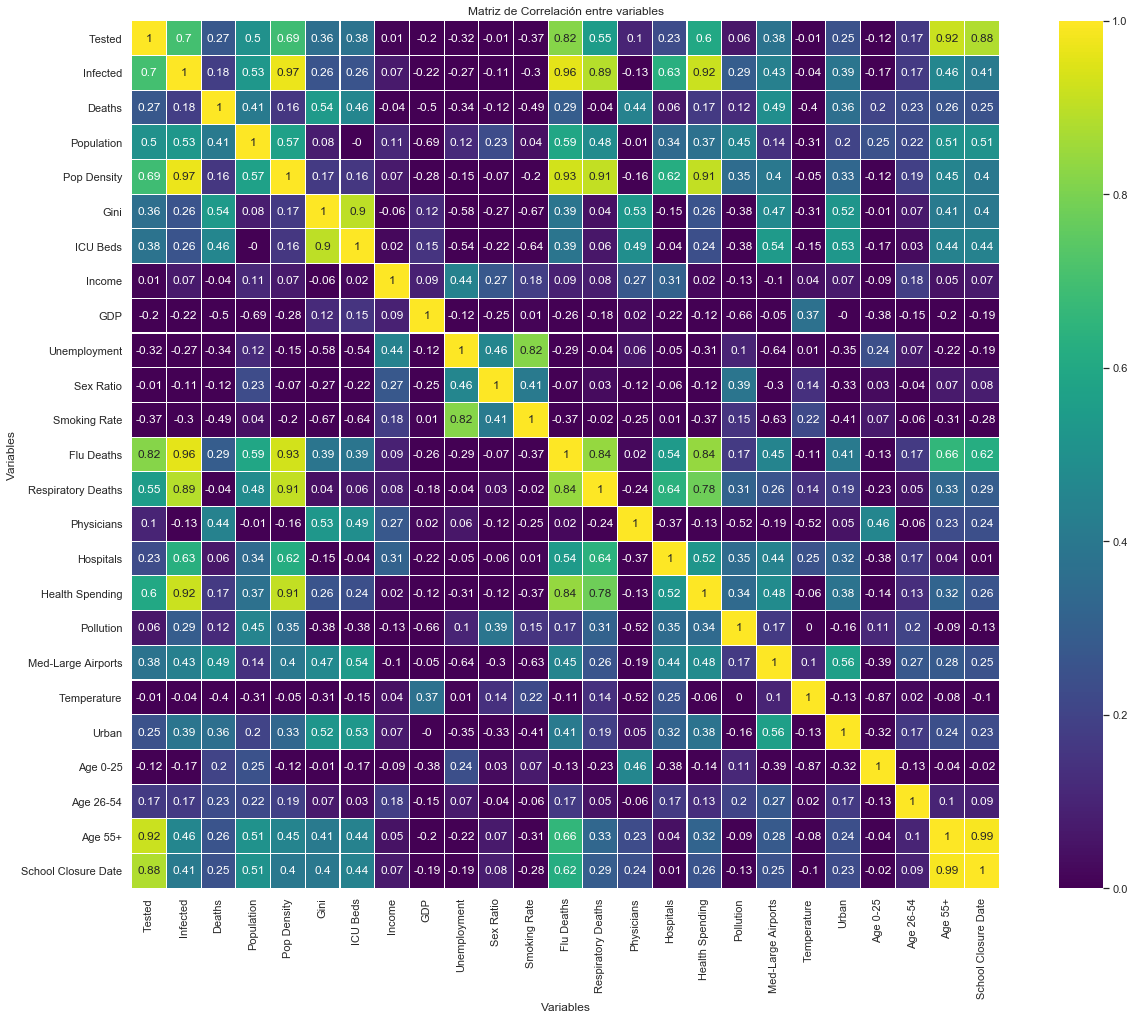

In [34]:
# Dado que se habia separado y eliminado las variable infectados y muertos, se vuelven a incorporar
# y ahora todas las variables están estandarizadas
data_post = pd.DataFrame(np.concatenate((x_tr_st,y1_tr_st,y2_tr_st),axis=1),columns=data_pre.columns)
plt.figure(figsize=(18,14))   # <- Otro modo de controlar el tamaño del plot dentro del Notebook
sns.heatmap(np.around(data_post.corr(),decimals=2), vmax=1,vmin=0, linewidths=0.1,
            square=True,annot=True,cmap='viridis',linecolor="white")
sns.set(font_scale=1)
plt.tight_layout()
plt.ylabel('Variables')
plt.xlabel('Variables')
plt.title('Matriz de Correlación entre variables')
plt.show()

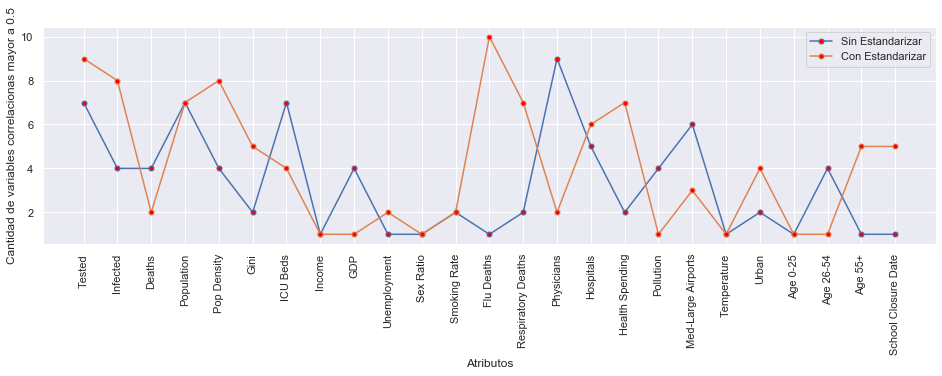

In [35]:
# Variables correlaciondas mayor a 0.5 para cada atributo
datacorr=pd.DataFrame(np.sum(np.around(data_pre.corr(),decimals=2)>=0.5),columns=['Sin st'])
datacorr['Con st']=pd.DataFrame(np.sum(np.around(data_post.corr(),decimals=2)>=0.5))
datacorr = datacorr.transpose()

#Gráfico de variables
plt.rcParams["figure.figsize"] = [16,4]
plt.plot(datacorr.columns,datacorr.iloc[0,:],label='Sin Estandarizar', marker='o', ms=5, mfc='red')
plt.plot(datacorr.columns,datacorr.iloc[1,:],label='Con Estandarizar', marker='o', ms=5, mfc='red')
plt.xticks(rotation=90)
plt.xlabel('Atributos')
plt.ylabel('Cantidad de variables correlacionas mayor a 0.5')
plt.legend()

vii) Comente el cambio de la matriz de correlación, ¿qué influyó?

**Comentarios:** El cambio es notorio, estandarizando las variables se puede ver que modifico las variables correlacionadas en cada caso. Por ejemplo, la variable número de test paso de tener buena correlación de 7 variables a 8, lo cual se transmite en un buen indicio para concluir que aplicar una regresión lineal a los datos puede traer buenos resultados.

Por lo otro lado, existen variables que redujieron las variables con las cual se correlacionan.

## 1.e Primera regresión

i) Realice una regresión lineal con los datos escalados y no escalados para predecir el número de infectados y muertos de manera separada.

In [37]:
from sklearn.metrics import mean_squared_error                            # Importa la función error cuadratico medio

# Regresión lineal sin escalar variable infectados
reg_unscaled1 = LinearRegression()                                        # Regresión Lineal de Min Cuadrados ordinario  
reg_unscaled1.fit(x_tr,y1_tr)                                             # Ajuste lineal del modelo
unscaled_predictions1 = reg_unscaled1.predict(x_tst)                      # Predice usando el modelo lineal
s1 = reg_unscaled1.score(x_tst,y1_tst)                                    
mqe1 = mean_squared_error(y1_tst,unscaled_predictions1)                   # Retorna el error cuadrado medio
print("(Infections) Score for scaled regression is:", s1)
print("(Infections) Mean squared error for unscaled regression is:",mqe1)

# Regresión lineal sin escalar variable muertos
reg_unscaled2 = LinearRegression()                                        
reg_unscaled2.fit(x_tr,y2_tr)                                             
unscaled_predictions2 = reg_unscaled2.predict(x_tst)                     
s2 = reg_unscaled2.score(x_tst,y2_tst)                                        # DUDA SI VA EL TR o TST  
mqe2 = mean_squared_error(y2_tst,unscaled_predictions2)                   
print("(Deaths) Score for scaled regression is:", s2)
print("(Deaths) Mean squared error for unscaled regression is:",mqe2)

(Infections) Score for scaled regression is: -34.33502188495457
(Infections) Mean squared error for unscaled regression is: 48185198110.08954
(Deaths) Score for scaled regression is: -59.49873623103192
(Deaths) Mean squared error for unscaled regression is: 241966742.83324623


In [38]:
# Regresión lineal escalados variable infectados
reg_scaled1 = LinearRegression()                                              # Regresión Lineal de Min Cuadrados ordinario  
reg_scaled1.fit(x_tr_st,y1_tr_st)                                             # Ajuste lineal del modelo
scaled_predictions1 = reg_scaled1.predict(x_tst_st)                           # Predice usando el modelo lineal
s1_st = reg_scaled1.score(x_tst_st,y1_tst_st)                                   # Retorna el R^2 del modelo
mqe1_st = mean_squared_error(y1_tst_st,scaled_predictions1)                   # Retorna el error cuadrado medio
print("(Infections) Score for scaled regression is:", s1_st)
print("(Infections) Mean squared error for unscaled regression is:",mqe1_st)

# Regresión lineal escalados variable muertos
reg_scaled2 = LinearRegression()                                               
reg_scaled2.fit(x_tr_st,y2_tr_st)                                            
scaled_predictions2 = reg_scaled2.predict(x_tst_st)                          
s2_st = reg_scaled2.score(x_tst_st,y2_tst_st)                                                      
mqe2_st = mean_squared_error(y2_tst_st,scaled_predictions1)                        
print("(Deaths) Score for scaled regression is:", s2_st)
print("(Deaths) Mean squared error for unscaled regression is:",mqe2_st)

(Infections) Score for scaled regression is: 0.7984157539842741
(Infections) Mean squared error for unscaled regression is: 0.20158424601572592
(Deaths) Score for scaled regression is: 0.8805932896565747
(Deaths) Mean squared error for unscaled regression is: 0.20337889357971767


**Comentarios:**  se puede apreciar que grandes diferencias del ajuste lineal con los datos sin pre-procesar y pre-procesados tanto para el error como para el score.

ii) Compare sus scores. ¿Cuál es la fórmula del score que utiliza el regresor? ¿Qué interpretación se le puede dar al score? Puede concluir que los datos escalados o no escalados entregar un mejor modelo?¿Sobre qué conjunto de datos (train, test o validation deberíamos comparar el score?

**Respuesta:**
* La función .score (X,y) mide la precisión y retorna el coeficiente de determinación R^2 de la predicción. El coeficiente R^2 es definida como $(1-u/v)$, donde $u=\sum (y_\text{True}-y_\text{Pred})^2$ y $v=\sum (y_\text{True}-y_\text{True mean})^2$. 
* Es importante mencionar que R^2 puede tomar el valor de 1, lo cual se puede interpretar como que el modelo es el adecuado, más aún, es el mejor, pero también puede ser negativo lo que implicaría que el modelo no es el correcto.
* De los resultados anterior, se puede concluir que escalar los datos entrega un resultado mucho mejor respecto al score y al error cuadratico medio. Los datos sin escalar entregan errores muy grandes y score negativos, mientras que escalando los datos se obtienen mejores valores de estas métricas.
* La función .score se debe aplicar sobre las muestras de test. En el caso de los valores escalados, se ve que el score sigue siendo bajo y esto se puede deber a las pocas muestras que tiene dicho conjunto y a la aleatoriedad a la hora de separar los conjuntos. Lo que se espera es que el score tienda a 1 para decir que el modelo es prometedor.

Fuente: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score

ii) Añada a la función creada en el item 1.d el ajuste lineal realizado, de modo que al llamar la función modificada se impriman los scores asociados a cada ajuste de curva y retome los conjuntos de entrenamiento, validación y prueba utilizados más los coeficientes de la regresión realizadas.

In [46]:
def call_regressions (data,v1,v2):
    x_tr,y1_tr,y2_tr,x_val,y1_val,y2_val,x_tst,y1_tst,y2_tst,x_tr_st,y1_tr_st,y2_tr_st,x_val_st,y1_val_st,y2_val_st,x_tst_st,y1_tst_st,y2_tst_st=call_separation_of_data(data,0.2,0.4)
    
    # Regresión lineal sin escalar variable infectados
    reg_unscaled1 = LinearRegression()                                        # Regresión Lineal de Min Cuadrados ordinario  
    reg_unscaled1.fit(x_tr,y1_tr)                                             # Ajuste lineal del modelo
    unscaled_predictions1 = reg_unscaled1.predict(x_tst)                      # Predice usando el modelo lineal
    s1 = reg_unscaled1.score(x_tst,y1_tst)                                     # Retorna el R^2
    c1 = reg_unscaled1.coef_                                                  # Parámetros del modelo
    mqe1 = mean_squared_error(y1_tst,unscaled_predictions1) 
    
    # Regresión lineal sin escalar variable muertos
    reg_unscaled2 = LinearRegression()                                        
    reg_unscaled2.fit(x_tr,y2_tr)                                             
    unscaled_predictions2 = reg_unscaled2.predict(x_tst)   
    s2 = reg_unscaled2.score(x_tst,y2_tst)
    c2 = reg_unscaled2.coef_ 
    mqe2 = mean_squared_error(y2_tst,unscaled_predictions2)
    
    # Regresión lineal escalados variable infectados
    reg_scaled1 = LinearRegression()                                              # Regresión Lineal de Min Cuadrados ordinario  
    reg_scaled1.fit(x_tr_st,y1_tr_st)                                             # Ajuste lineal del modelo
    scaled_predictions1 = reg_scaled1.predict(x_tst_st)                           # Predice usando el modelo lineal
    s1_st = reg_scaled1.score(x_tst_st,y1_tst_st)
    c1_st = reg_scaled1.coef_ 
    mqe1_st = mean_squared_error(y1_tst_st,scaled_predictions1)

    # Regresión lineal escalados variable muertos
    reg_scaled2 = LinearRegression()                                               
    reg_scaled2.fit(x_tr_st,y2_tr_st)                                            
    scaled_predictions2 = reg_scaled2.predict(x_tst_st)      
    s2_st = reg_scaled2.score(x_tst_st,y2_tst_st)
    c2_st = reg_scaled2.coef_ 
    mqe2_st = mean_squared_error(y2_tst_st,scaled_predictions2)
    
    return (s1,s2,s1_st,s2_st,mqe1,mqe2,mqe1_st,mqe2_st,c1,c2,c1_st,c2_st,
           x_tr,y1_tr,y2_tr,x_tr_st,y1_tr_st,y2_tr_st,x_tst,y1_tst,y2_tst,
           x_tst_st,y1_tst_st,y2_tst_st)

iv) Ejecute repetidas veces, no es necesario que reporte todos los resultados, tan solo reportar la variabilidad y concluir al respecto tomando en cuenta sus comentarios anteriores.

Text(0.5, 1.0, 'Variabilidad de score en cada iteración')

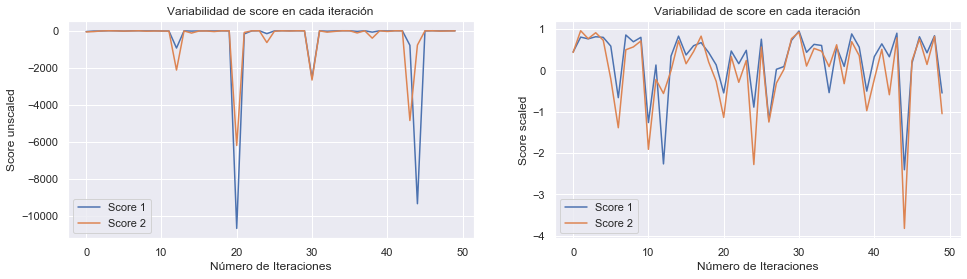

In [61]:
# Resultados de 50 iteraciones del Score
result = np.zeros((4,50))
for i in range(50):
    result[:,i] = call_regressions(data,0.18,0.5)[0:4]
plt.rcParams['figure.figsize']=[16,4]   
plt.subplot(1,2,1)
plt.plot(range(50),result[0,:], label = 'Score 1')
plt.plot(range(50),result[1,:], label = 'Score 2')
plt.xlabel('Número de Iteraciones')
plt.ylabel('Score unscaled')
plt.title('Variabilidad de score en cada iteración')
plt.legend(loc="lower left") 
plt.subplot(1,2,2)
plt.plot(range(50),result[2,:], label = 'Score 1')
plt.plot(range(50),result[3,:], label = 'Score 2')
plt.xlabel('Número de Iteraciones')
plt.ylabel('Score scaled')
plt.legend(loc="lower left") 
plt.title('Variabilidad de score en cada iteración')

**Comentarios:** es importante destacar que cada vez que se itera el código, el train, validation y test set, se distribuyen de forma distinto y sumado a esto la poca cantidad de dato genera gran variabilidad. 

v) Quéde con un ajuste que entregue un buen resultado, imprima los coeficientes asociados a cada atributo del dataset

In [72]:
error1_unscaled = float("inf")
error2_unscaled = float("inf")
error1_scaled   = float("inf")
error2_scaled   = float("inf")
for i in range(1000):                                                    # Iteraciones
    reg = call_regressions(data,0.18,0.5)
    if reg[4] < error1_unscaled:                                         # Mínimo error para infectados sin estandarización
        error1_unscaled = reg[4]
        coef1_unscaled  = reg[8]
    if reg[5] < error2_unscaled:                                         # Mínimo error para muertos sin estandarización
        error2_unscaled = reg[5]
        coef2_unscaled  = reg[9]
    if reg[6] < error1_scaled:                                           # Mínimo error para infectados con estandarización
        error1_scaled   = reg[6]
        coef1_scaled    = reg[10]
    if  reg[7] < error2_scaled:                                          # Mínimo error para muertos con estandarización
        error2_scaled   = reg[7]
        coef2_scaled    = reg[11]

Text(0.5, 1.0, 'Coeficiente del modelo con mínimo error')

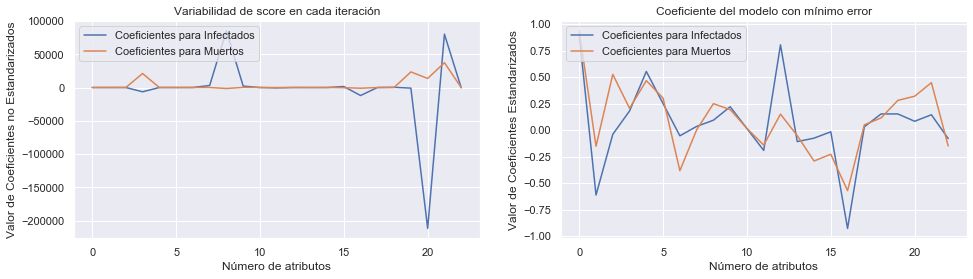

In [73]:
# Gráfica para ver como varían los coeficienes respecto al otro
plt.rcParams['figure.figsize']=[16,4]   
plt.subplot(1,2,1)
plt.plot(range(len(coef1_unscaled)),coef1_unscaled, label = 'Coeficientes para Infectados')
plt.plot(range(len(coef2_unscaled)),coef2_unscaled, label = 'Coeficientes para Muertos')
plt.xlabel('Número de atributos')
plt.ylabel('Valor de Coeficientes no Estandarizados')
plt.title('Variabilidad de score en cada iteración')
plt.legend(loc="upper left") 
plt.subplot(1,2,2)
plt.plot(range(len(coef1_unscaled.T)),coef1_scaled.T, label = 'Coeficientes para Infectados')
plt.plot(range(len(coef1_unscaled.T)),coef2_scaled.T, label = 'Coeficientes para Muertos')
plt.xlabel('Número de atributos')
plt.ylabel('Valor de Coeficientes Estandarizados')
plt.legend(loc="upper left") 
plt.title('Coeficiente del modelo con mínimo error')

vi) Comente:

Respuesta:
* Del gráfico anterior, que el los coeficientes para el modelo sin escalar son extremedamente diferentes en orden de magnitud, lo cual claramente afecta en el rendimiento del modelo debido a que si se multiplica un atributo por 100000 tendrá mucha más relevancia sobre los demás atributos y no se obtendrá un buen modelo. 
* Para el caso de variables escaladas se puede ver que todos los coeficientes oscilan entre -1 y 1, lo que claramente entrega un mejor modelo. Además, se puede ver que el compartamiento de los coeficientes para la predicción de infectados y muertos presentan un comportamiento similar. Esto último, no asegura existo en el modelo dado que los score siguen siendo bajos, pero sin duda se llega a un mejor modelo considerando estandarizando los datos.

**Comentarios:** sucede el mismo problema de variabilidad en cada iteración que el caso anterior, pero es importante destacar que el orden de magnitud de los coeficientes son similares para dataset sin estandarizar y estandarizados.

## 1.f Transformaciones Simples

i) Grafique como se distribuyen los infectados para datos no estandarizados, apoyese en el siguiente código. Viendo el gráfico, ¿Pareciera que una representación lineal funcionará bien para moderlar este tipo de datos? Pruebe un par de transformaciones simples, como logaritmo o raíz cuadrada (libre elección) y comente los gráficos. ¿Estos gráficos permiten concluir algo sobre el comportamiento de un modelo lineal o solo sirven de caracter exploratorio?

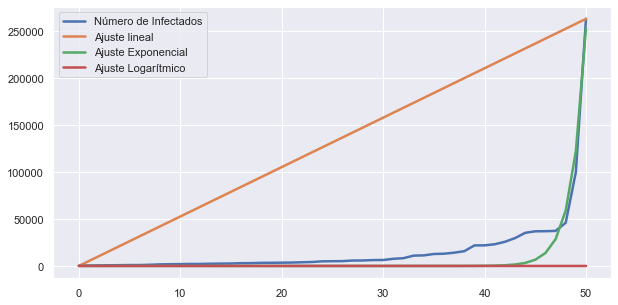

In [74]:
y = data_pre["Infected"]

# Gráfico de comparación entre una recta y los valores a predecir del dataset

plt.rcParams["figure.figsize"] = [10,5]
plt.plot(np.arange(0,y.shape[0],1),y.sort_values(),label='Número de Infectados',linewidth=2.5)
plt.plot(np.arange(0,y.shape[0],1),np.linspace(0,((y.sort_values())).max(),num=y.shape[0]),label='Ajuste lineal',linewidth=2.5)

#Ajuste exponencial
# parámetros del ajuste
par   =  scipy.optimize.curve_fit(lambda t,a,b: a*np.exp(b*t), np.arange(0,y.shape[0],1) ,  y.sort_values(),  p0=(4, 0.1))[0]
x_exp =  np.arange(0,y.shape[0],1)
y_exp =  par[0]*np.exp(par[1]*x_exp)
plt.plot(x_exp,y_exp,label='Ajuste Exponencial',linewidth=2.5)

# Ajuste Logaritmico
par1  =  np.polyfit(np.arange(0,y.shape[0],1),np.log(y.sort_values()),1)     # Parámetros del ajuste
x_log =  np.arange(0.01,y.shape[0],1)
y_log =  par1[0]*np.log(x_log)+par[1]
plt.plot(x_log,y_log,label='Ajuste Logarítmico',linewidth=2.5)

# Leyenda de los gráficos
plt.legend()

Respuesta: 
* Se puede ver que en la mayoría de los estados tienen una cantidad similar de infectados, pero existe un estado que tiene mucho infectados en comparación a los demas, se podría considerar un outliers, lo cual claramente afecta el ajuste.
* Como se puede ver en el gráfico anterior, los datos de infectados no tienen un comportamiento lineal por lo que claramente no es el método adecuado. 
* Se puede concluir que la curva que mejor se ajusta es el ajuste exponencial, pero tampoco entrega información relevante dado que si bien puede exister una relación entre los infectados de cada estado, el eje x solo representa la cantidad de estados de los cuales se tienen los datos y no una relación directa entre estos. Por lo tanto, este tipo de información solo sirve de caracter exploratorio.

## 1.g 10-fold sobre la potencia

i) Probaremos la utilizada real de realizar una transformación del target del tipo $I \gets I^{i}$ con $i \in [-1,1]$ haciendo 10-_fold_ variando el valor de $i$ en a lo menos 10 incrementos. Puede basarse en la estructura siguiente. Debe elegir un estimador del error de validación de cada modelo (e.g. mediana, promedio,...) y comentar brevemente por qué eligio tal estimador.

Luego, grafique cómo varía el error de validación en función de $i$.

Finalmente, con el mejor valor de $i$ encontrado, entre el regresor lineal con todos los datos del entrenamiento y compare su desempeño con los modelos anteriores. 

¿Puede afirmar que alguna de las transformaciones mejore el desempeño del modelo?

In [77]:
folds               = KFold(10)
xy_data             = data_pre.drop(columns=["Deaths"])               # Elimina Columna Deaths
errors              = []                                               
scores              = []
seq                 = np.linspace(-1,1,10)
median_errors       = []
median_scores       = []

for i in seq: 
    errors_i = []      # Error asociado a i
    scores_i = []      # Score asociado a i
    # Asigna los índices para train y validation test para los 10 folds
    for train_index, val_index in folds.split(xy_data):
        y_       =  xy_data["Infected"]                                  
        y_i      =  y_**(i)                                           # Target elevado a la potencia i
        y_tr_i   =  y_i[train_index]
        y_val_i  =  y_i[val_index]
        x_       =  xy_data.drop(columns="Infected")                  # Se elimina la columna Infected para predicción
        x_tr_i   =  x_.loc[train_index,:]
        x_val_i  =  x_.loc[val_index,:]  
        regre    =  LinearRegression()                                 # Regresión Lineal
        # Se entrena el modelo 
        regre.fit(x_tr_i, y_tr_i) 
        
        # Calcular error del Modelo y guardar
        pred        =  regre.predict(x_val_i)                         # Predicción del Modelo sobre val con 10 Folds
        error_fold  =  mean_squared_error(y_val_i,pred)               # Error cuadrático Medio para 10 Folds
        score_fold  =  regre.score(x_val_i, y_val_i)              
        errors_i.append(error_fold)
        scores_i.append(score_fold)

    # Escoger estimador de error del modelo
    errors.append(np.mean(errors_i))
    scores.append(np.mean(scores_i))
    median_errors.append(np.median(errors_i))
    median_scores.append(np.median(scores_i))

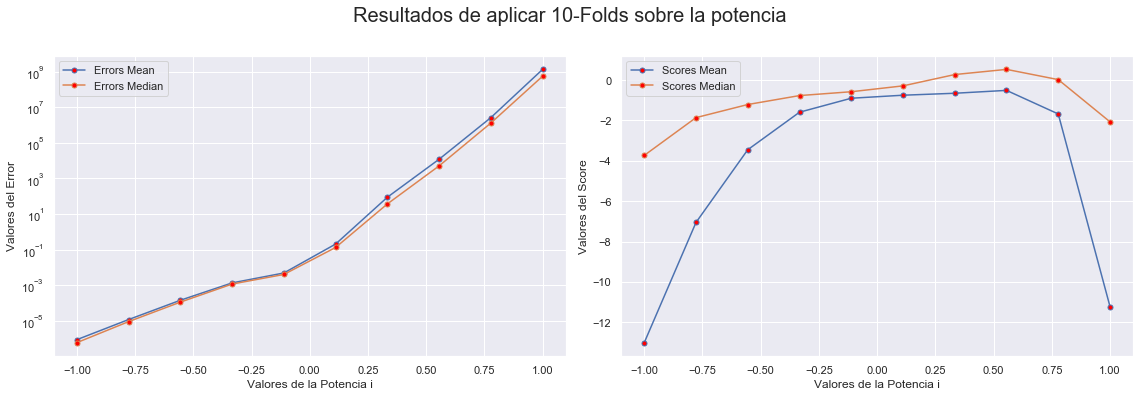

In [78]:
plt.rcParams["figure.figsize"]=[16,5]
plt.suptitle('Resultados de aplicar 10-Folds sobre la potencia',size=20,y=1.1)
plt.subplot(1,2,1)
plt.semilogy(seq, errors, marker='o', ms=5, mfc='red', label = 'Errors Mean')
plt.semilogy(seq, median_errors, marker='o', ms=5, mfc='red', label = 'Errors Median')
plt.xlabel('Valores de la Potencia i')
plt.ylabel('Valores del Error')
plt.legend()
plt.subplot(1,2,2)
plt.plot(seq, scores, marker='o', ms=5, mfc='red', label = 'Scores Mean')
plt.plot(seq, median_scores, marker='o', ms=5, mfc='red', label = 'Scores Median')
plt.xlabel('Valores de la Potencia i')
plt.ylabel('Valores del Score')
plt.tight_layout()
plt.legend()
plt.show()

**Comentarios:**
* Como se puede ver en el gráfico anterior, al utilizar la mediana se obtiene mejores resultados para score y levemente, un menor error. Por lo tanto, se concluye que se utiliza el valor de la mediana para cuantificar el error y score de los 10 Folds.
* Respecto a los valores de potencia, es conveniente quedarse con el resultado de i= 0.33333333, dado que genera un score menor mayor a 0 y un error no tan grande como al considerar i= 0.5555. 

**Comparación de los modelo con i=0.333 y modelo con valores estandarizados para Infectados**

In [80]:
# Regresión lineal escalados variable infectados
reg_scaled1 = LinearRegression()                                              # Regresión Lineal de Min Cuadrados ordinario  
reg_scaled1.fit(x_tr_st,y1_tr_st)                                             # Ajuste lineal del modelo
scaled_predictions1 = reg_scaled1.predict(x_tst_st)                           # Predice usando el modelo lineal
s1_st = reg_scaled1.score(x_tst_st,y1_tst_st)                                   # Retorna el R^2 del modelo
mqe1_st = mean_squared_error(y1_tst_st,scaled_predictions1)                   # Retorna el error cuadrado medio
print("(Infections) Score for scaled regression is:", s1_st)
print("(Infections) Mean squared error for unscaled regression is:",mqe1_st)

# Regresión Lineal a la Potencia i=0.333 
reg_i = LinearRegression()
reg_i.fit(x_tr,y1_tr**(0.3333))
i_predictions = reg_i.predict(x_tst)
s_i = reg_i.score(x_tst,y1_tst**(0.3333))
mqe_i = mean_squared_error(y1_tst**(0.3333),i_predictions) 
print("(Infections) Score for i-potencia regression is:", s_i)
print("(Infections) Mean squared error for i-potencia regression is:",mqe_i)

(Infections) Score for scaled regression is: 0.7984157539842741
(Infections) Mean squared error for unscaled regression is: 0.20158424601572592
(Infections) Score for i-potencia regression is: -3.0144217148703873
(Infections) Mean squared error for i-potencia regression is: 696.5608450622212


**Comentarios:** se puede ver que sigue siendo mejor método cuando se estandarizan las variables. Es importante mencionar que si bien, el método de la potencia obtuvo buen score para el conjunto de validación en los 10 Fold, a la hora de predecir con el conjunto de entrenamiento se obtiene un mal resultado.

**Comentario Final** 

Es normal presentar gran variabilidad en cada iteración. Esto se debe a que los infectos o muertos de algun estado se pueden predecir mediante el uso de un regresión lineal, pero no de todos, sobre de los estados que presentan grandes valores en los atributos. Para estos últimos, es lógico pensar que se obtendrá peor score que los otros.